In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR/'
from commonfunctions import *

In [18]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

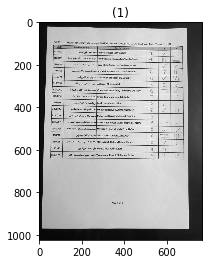

In [19]:
img = cv2.imread('../4.jpg', 0)
show_images([img])
# plt_imshow('original image',img)

In [45]:
# Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY| cv2.THRESH_OTSU)
print(thresh)

120.0


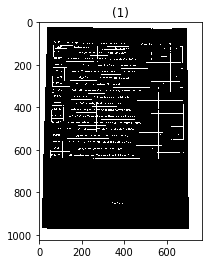

In [33]:
# Invert the image
img_bin = 255-img_bin 
show_images([img_bin])
# plt_imshow('Image_bin',img_bin)

In [34]:
# img_binary= cv2.imread('Image_bin.jpg', 0)
# plt.title('binary image')
# plt.imshow(img_binary)
# plt.grid(False)
# plt.show()

In [35]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

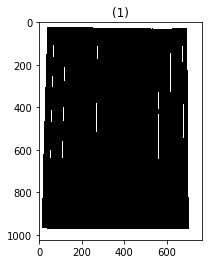

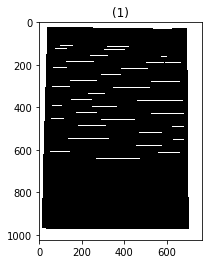

In [36]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
# plt_imshow("verticle_lines.jpg",verticle_lines_img)
show_images([verticle_lines_img])
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
# plt_imshow("horizontal_lines.jpg",horizontal_lines_img)
show_images([horizontal_lines_img])

In [37]:
# img_binary= cv2.imread('verticle_lines.jpg', 0)
# plt_imshow('verticle lines image',img_binary)
# img_binary= cv2.imread('horizontal_lines.jpg', 0)
# plt_imshow('horizontal lines image',img_binary)

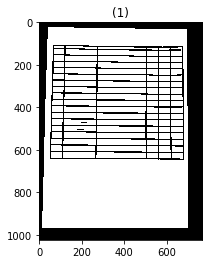

In [38]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# plt_imshow("img_final_bin.jpg",img_final_bin)
show_images([img_final_bin])

In [39]:
# img_binary= cv2.imread('img_final_bin.jpg', 0)
# plt_imshow('img final bin image',img_binary)

In [40]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [41]:
# Find contours for image, which will detect all the boxes
im, contours,im2 = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

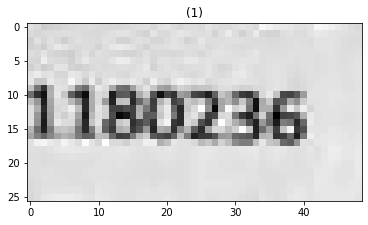

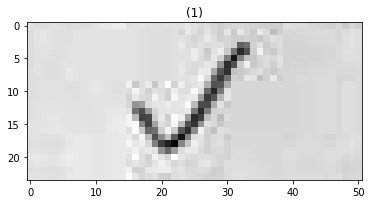

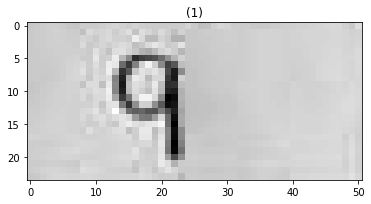

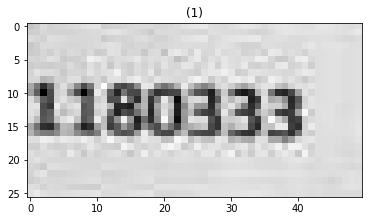

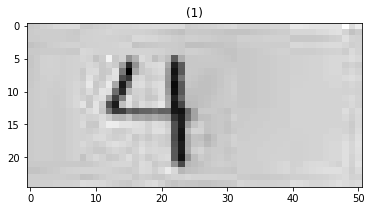

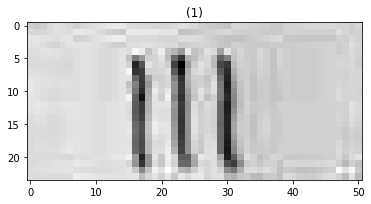

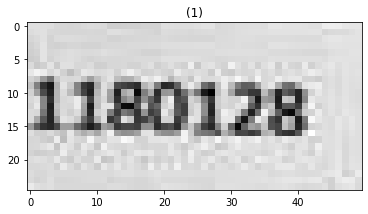

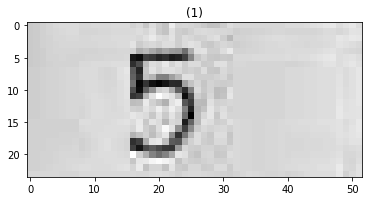

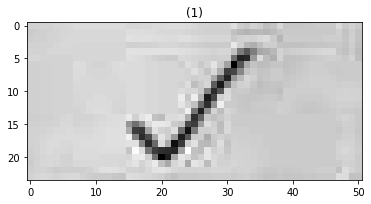

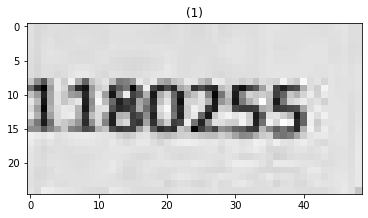

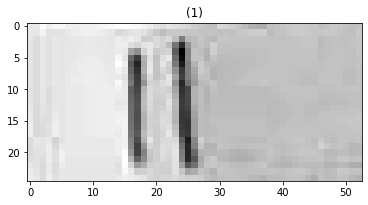

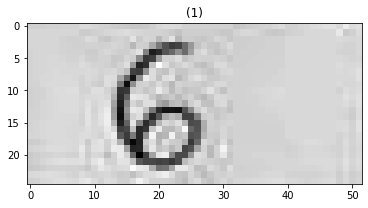

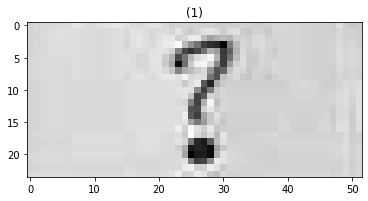

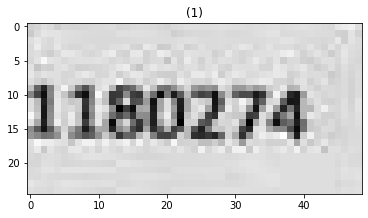

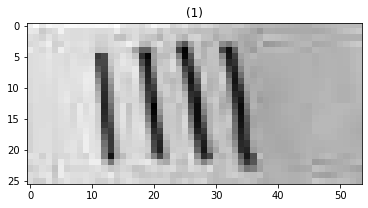

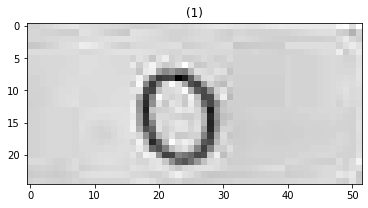

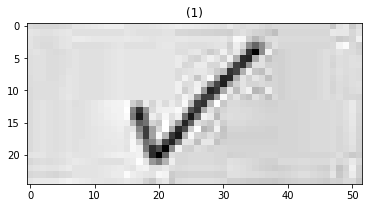

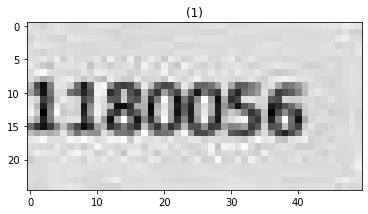

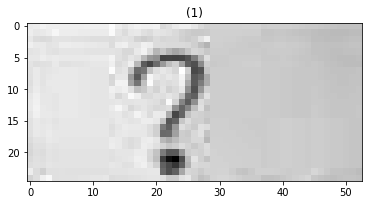

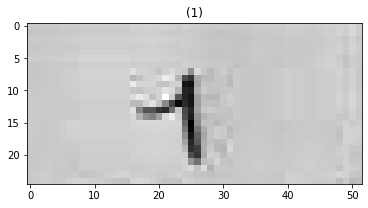

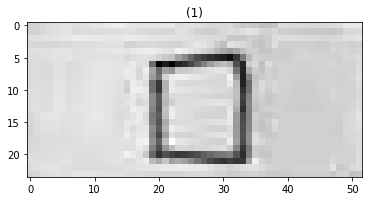

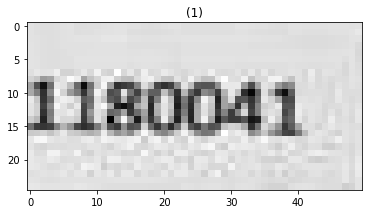

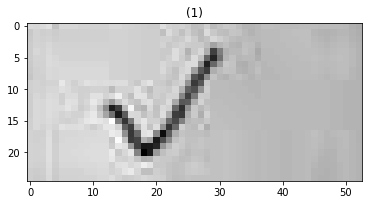

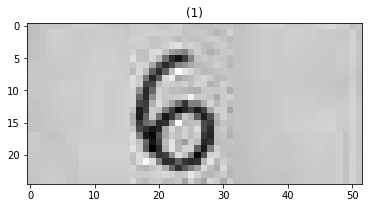

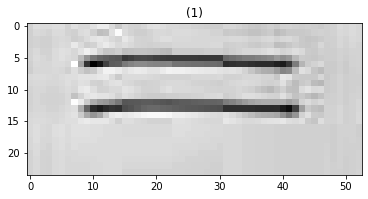

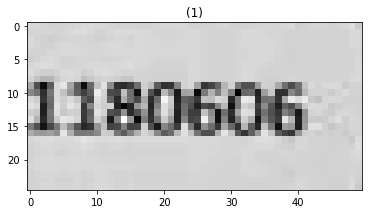

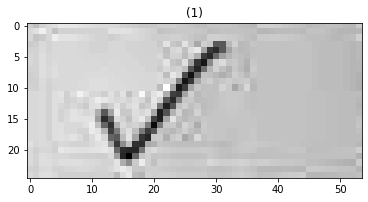

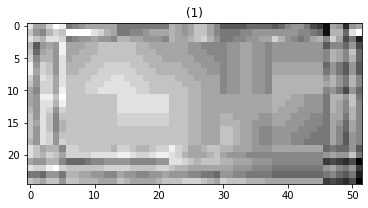

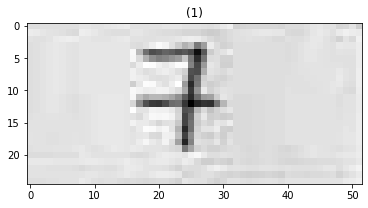

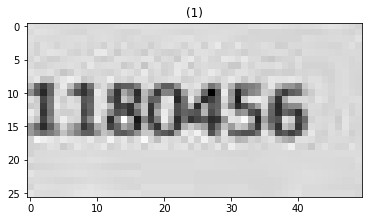

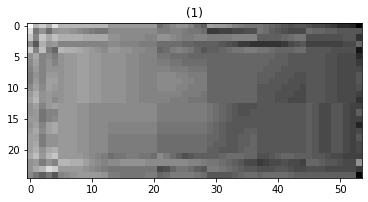

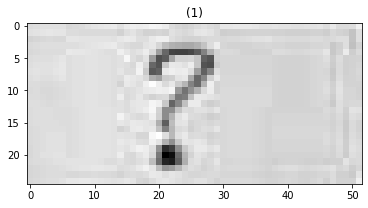

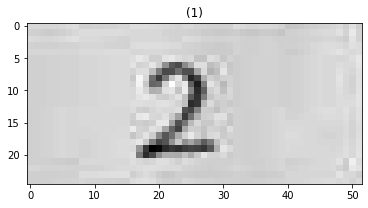

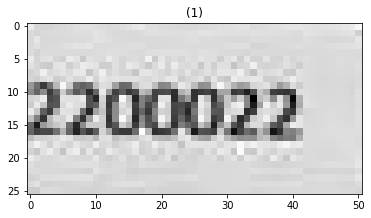

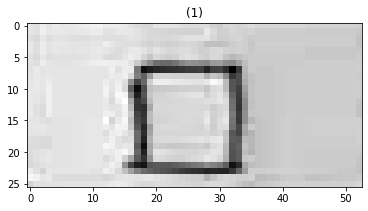

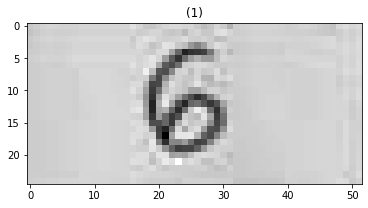

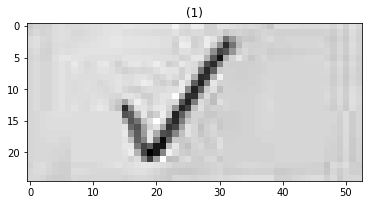

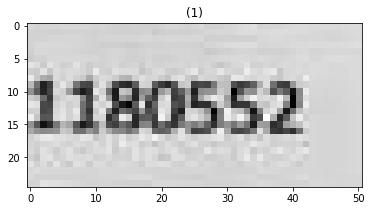

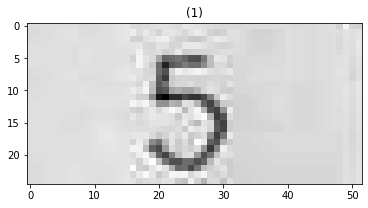

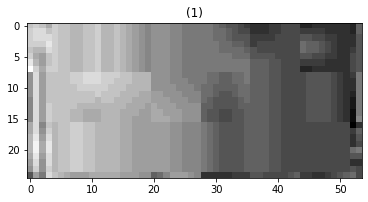

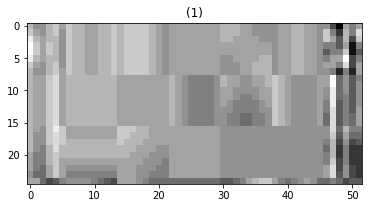

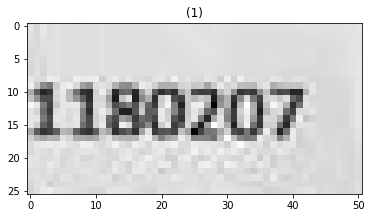

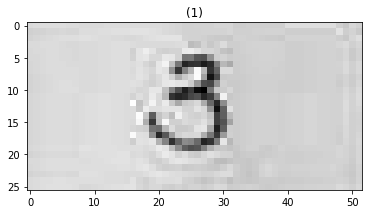

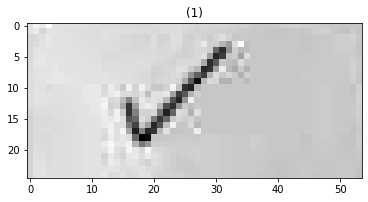

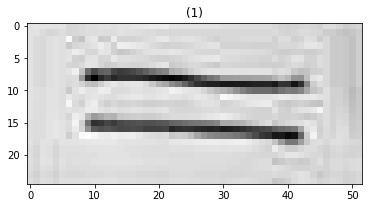

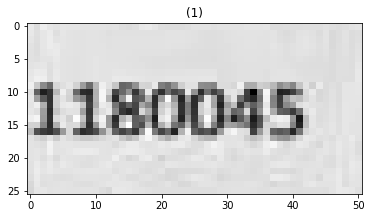

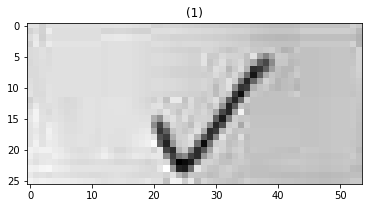

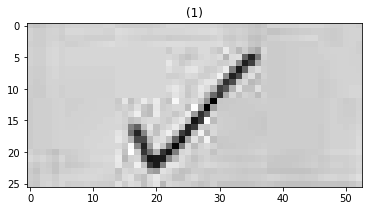

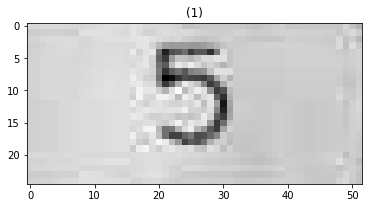

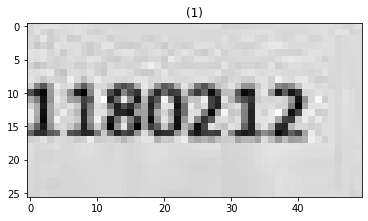

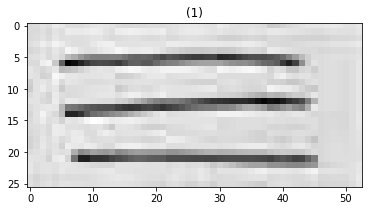

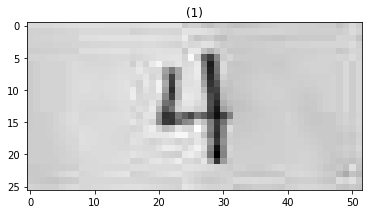

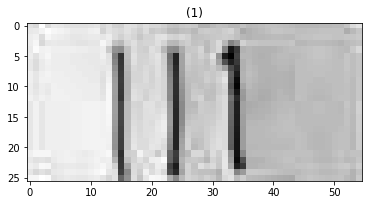

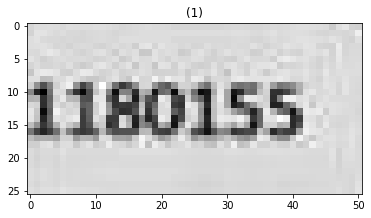

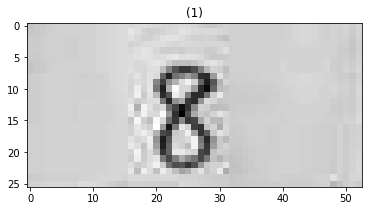

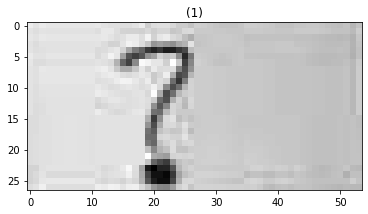

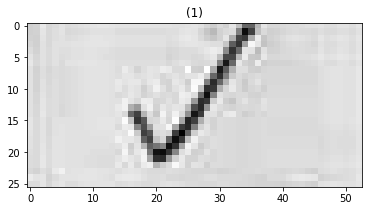

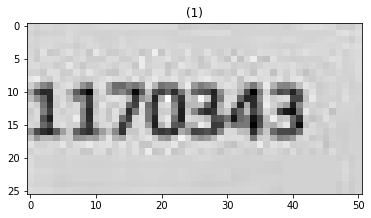

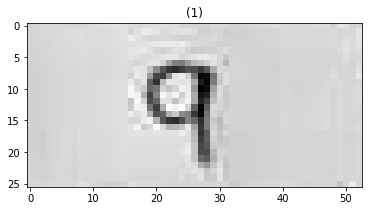

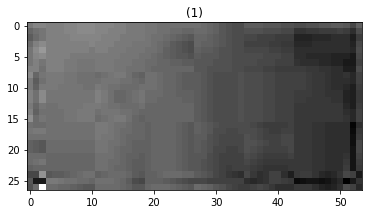

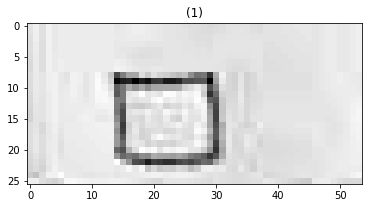

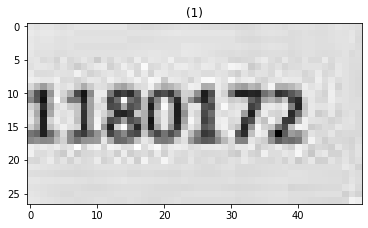

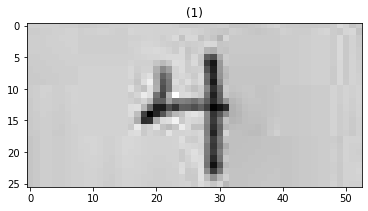

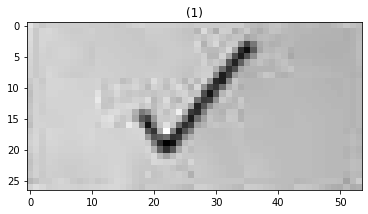

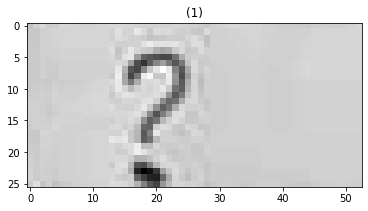

In [42]:
idx = 0
for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
        if (w <= 80 and h>20 and h<35) :
            idx += 1
            new_img = img[y:y+h, x:x+w]
#             plt_imshow('./croped'+str(idx),new_img)
            show_images([new_img])
            